# Clustering K-means

# Libreias que vamos a usar

In [7]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from statistics import variance
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans

# Seed Dataset

## Descripcion del dataset

El grupo examinado comprende de granos pertenecientes a tres variedades diferentes de trigo: Kama, Rosa y Canadiense, 70 elementos cada una,seleccionados al azar para el experimento.

Se detectó una visualización de alta calidad de la estructura interna del grano mediante una técnica de rayos X blandos.
Esta técnica no es destructiva y es considerablemente más barata que otras técnicas de imagen más sofisticadas, como la microscopía de barrido o la tecnología láser. Las imágenes se grabaron en placas KODAK de rayos X de 13x18 cm. Los estudios se realizaron con granos de trigo cosechados procedentes de campos experimentales, explorados en el Instituto de Agrofísica de la Academia de Ciencias de Polonia en Lublin.


Para construir los datos, se midieron siete parámetros geométricos de los granos de trigo

1. Area
2. Perímetro
3. Compacidad C = 4*pi*A/P^2
4. Longitud del grano
5. Anchura del grano
6. Coeficiente de asimetría
7. Longitud del surco del núcleo

Charytanowicz, M., Niewczas, J., Kulczycki, P., Kowalski, P. A., Łukasik, S., & Żak, S. (2012). seeds Dataset. Obtenido de [Link](https://archive.ics.uci.edu/ml/datasets/seeds#)

# Cargamos el csv correspondiente

In [8]:
data = pd.read_csv("seeds_dataset.csv")
data 

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
1,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


El dataset incluia los datos de referecnia del tipo de semillas, pero estos fueron eliminados antes de cargar los datos, debido a que el metodo cluster k-mean no hace uso de estos datos, ya que es un metodo unsupervisado de entrenamiento.


# Analisis de datos

Cargamos los datos para el entrenamiento no regulado de los k-means

In [9]:
x = data
x

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
1,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


Podemos observar que los datos tienen diferente valores de escala y dimension, para ello utilizamos _StandardScaler_, el  cual nos permite estandarizar las características eliminando la media y escalando a la varianza unitaria.

Por medio de la formula:
$$ z = \frac{(x - u)}{  s} $$

donde u reresenta a la media y s representa a la varianza estandar

In [10]:
scaler  = StandardScaler()
x_train = scaler.fit_transform(x)
x_train

array([[ 1.11880257e-02,  8.22375713e-03,  4.28515270e-01, ...,
         1.97432229e-01, -1.78816620e+00, -9.22013487e-01],
       [ 1.42097769e-01,  2.15462437e-01,  6.06017918e-05, ...,
         1.41701823e-01, -9.86151745e-01, -3.83577423e-01],
       [-1.92066576e-01, -3.60200562e-01,  1.44238325e+00, ...,
         2.08047544e-01, -6.67479334e-01, -1.18919199e+00],
       ...,
       [-5.67570840e-01, -6.90247348e-01,  7.33948301e-01, ...,
        -7.06044846e-02,  3.07658816e+00, -7.18060432e-01],
       [-1.03608992e+00, -1.03564515e+00, -8.01701104e-01, ...,
        -1.12152071e+00, -6.81351965e-02, -7.42534799e-01],
       [-8.77620233e-01, -9.35863561e-01, -1.10234659e-01, ...,
        -7.55292327e-01,  1.29122264e+00, -7.03783718e-01]])

# Metodo del codo

> En el método del codo, la varianza se traza contra el número de clusters. Los primeros conglomerados introducirán mucha varianza e información, pero en algún momento, la ganancia de información será baja, lo que dará una estructura angular al gráfico.

Este metodo es bastante util pues nos permite conseguir un valor del numero de clusters de tal manera que no tnemos que estar probando de manera empirica nuestras predicciones

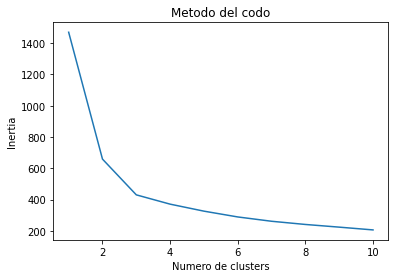

In [11]:
inertia=[]

for i in range(1,11): 
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
    kmeans.fit(x_train)
    inertia.append(kmeans.inertia_)


plt.plot(range(1,11),inertia)
plt.title('Metodo del codo')
plt.xlabel('Numero de clusters')
plt.ylabel('Inertia')
plt.show()

# PCA

>Con un mínimo esfuerzo adicional, el PCA proporciona una hoja de ruta para reducir un conjunto de datos complejos a
una dimensión inferior para revelar una dinamica mas simplificada.

Usamos la implementacion de sklearn, pues es recomendado para inicializar los datos antes de realizar los clusters 

In [12]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_train)

components = pd.DataFrame(data = principalComponents
             , columns = ['principal componente 1', 'principal componente 2'])

components

,principal componente 1,principal componente 2
0,-0.003386,1.913214
1,0.317047,0.783669
2,-0.459443,1.907225
3,-0.591936,1.931069
4,1.102910,2.068090
...,...,...
205,-1.991107,0.865956
206,-2.726865,-0.208190
207,-1.403633,-1.298593
208,-2.339328,0.099699


Finalmente aplicamos el metodo de sklearn _Kmeans_ el cual toma en nuestro caso 3 parametros

1. Numero de clusters
2. Valor del numero randomizado de los valores del centroide inicial
3. Numero de iteraciones

In [13]:
clusters  = KMeans( n_clusters=3, random_state= 42 ,max_iter = 1000).fit(principalComponents)
labels = clusters.predict(principalComponents)
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1])

Finalmente obtenemos los valores de los clusters de nuestros datos

In [14]:
data['class'] = labels
data

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,class
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,2
1,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,2
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,2
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,2
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,2
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,1
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,1
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,1
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,1


Igualmente usamos la estructura _DataFrame_ de pandas para visualizar mejor los datos que obtnenemos del PCA y los valores de los clusters de cada dato

In [15]:
predictions = pd.DataFrame(data = labels, columns = ['Class'])

finalDf = pd.concat([components, predictions[['Class']]], axis = 1)

fig = plt.figure(figsize = (8,8))


ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Componente 1', fontsize = 15)
ax.set_ylabel('Principal Componente 2', fontsize = 15)
ax.set_title('Clusters', fontsize = 20)
colors = ['r', 'g', 'b']
class_labels = [0,1,2]
for target, color in zip(class_labels,colors):
    indicesToKeep = finalDf['Class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal componente 1']
               , finalDf.loc[indicesToKeep, 'principal componente 2']
               , c = color)
ax.scatter(clusters.cluster_centers_[:, 0], clusters.cluster_centers_[:, 1], s=200, c='black')
ax.legend(class_labels)
ax.grid()

NameError: name 'predictions' is not defined

Finalmente usamos _scatter_ con los valores del PCA y los labels, para observar nuestros clusters, ademas, aprovechamos que sklearn nos entrega los centroides para graficarlos en el mismo cuadro.